In [229]:
import pandas as pd
import numpy as np
import unicodedata
from nltk.tokenize import sent_tokenize #tokenizes sentences
from nltk.tokenize import word_tokenize #tokenizes words
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk import pos_tag #tags the parts of speech.  VB=Verbs
from nltk import RegexpParser
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,  KFold
punctuation_ = set(string.punctuation)
stopwords_ = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import scipy.stats as scs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LassoCV

In [13]:
acnh=pd.read_csv('../archive/animal_crossing_dataset.csv')
acnh.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [14]:
doom=pd.read_csv('../archive/doom_crossing_dataset.csv')
doom.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename'],
      dtype='object')

In [15]:
index_a=pd.Index(acnh['id'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['id'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)

In [16]:
Xa=pd.DataFrame(acnh['title']).set_index(index_a)
Xd=pd.DataFrame(doom['title']).set_index(index_d)
X_titles=pd.concat([Xd, Xa])
y=pd.concat([doom_sub ,acnh_sub])
for title in X_titles.iloc[:,0]:
    title.replace('villagers', 'villager')

In [44]:
y=pd.get_dummies(y)
y=y.iloc[:,0]

In [45]:
y

id
gtli3b    0
fnj4e5    0
gemj1h    0
fzhpqt    0
g4v23f    0
         ..
g9674v    1
fnl57y    1
g7mis1    1
gtz9fa    1
fmjv7l    1
Name: AnimalCrossing, Length: 1597, dtype: uint8

In [76]:
tfidf = TfidfVectorizer(stop_words='english', smooth_idf=True)  # Checkout out the options!

document_tfidf_matrix = tfidf.fit_transform(X_titles.iloc[:,0])

X_tf_idf = pd.DataFrame(document_tfidf_matrix.todense(), columns = tfidf.vocabulary_)
X_tf_idf.set_index(X_titles.index, inplace=True)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, y, test_size=0.2)

In [78]:
X_train

,remember,fun,send,appreciacion,lead,sound,designer,id,chad,mossholder,...,aware,checked,spa,witchy,sleepy,holding,genuinely,38,friendship,screening
id,,,,,,,,,,,,,,,,,,,,,
f3t56m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ggeswq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fn2tf0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gsfnn9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gtcua3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gkxbg0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ezxfcs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fsud2a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
model_L2 = LogisticRegression(C=1000)#solver lbfgs, L2 cost function
model_L2.fit(X_train, y_train)

/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000)

In [80]:
yhat=model_L2.predict(X_test)

In [81]:
train_pred_probs = model_L2.predict_proba(X_train)
log_loss(y_train, train_pred_probs, normalize=False)#total log loss for the 

44.61302021199755

In [82]:
train_pred_probs
df = pd.DataFrame({'prob': train_pred_probs[:,1], 'y': y_train})
df.sort_values('prob', inplace=True)

actual_p = df.y.sum()
actual_n = df.shape[0] - df.y.sum()

In [83]:
tn, fp, fn, tp=confusion_matrix(y_test, yhat).ravel()

In [84]:
conf_mat=[[tp, fn],[fp, tn]]
conf_mat

[[106, 45], [43, 126]]

In [294]:
def calculate_threshold_values(prob, y):
    '''
    Build dataframe of the various confusion-matrix ratios by threshold
    from a list of predicted probabilities and actual y values
    '''
    df = pd.DataFrame({'prob': prob, 'y': y})
    df.sort_values('prob', inplace=True)
    
    actual_p = df.y.sum()
    actual_n = df.shape[0] - df.y.sum()

    df['tn'] = (df.y == 0).cumsum()
    df['fn'] = df.y.cumsum()
    df['fp'] = actual_n - df.tn
    df['tp'] = actual_p - df.fn

    df['fpr'] = df.fp/(df.fp + df.tn)
    df['tpr'] = df.tp/(df.tp + df.fn)
    df['precision'] = df.tp/(df.tp + df.fp)
    df['F1'] = 2*((df.tp/(df.tp + df.fp)) * (df.tp/(df.tp + df.fn)))/((df.tp/(df.tp + df.fp)) + (df.tp/(df.tp + df.fn)))
    df = df.reset_index(drop=True)
    return df
    
def plot_roc(ax, df, val):
    ax.plot([1]+list(df.fpr), [1]+list(df.tpr), label="ROC"+f'{1/val} Regularization Constant')
    #ax.plot([0,1],[0,1], 'k', label="random")
    ax.set_xlabel('fpr', fontsize=14)
    ax.set_ylabel('tpr', fontsize=14)
    #ax.set_title('ROC Curve')
    ax.legend()
    
def plot_precision_recall(ax, df):
    ax.plot(df.tpr,df.precision, label='precision/recall')
    #ax.plot([0,1],[0,1], 'k')
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision/Recall Curve')
    ax.plot([0,1],[df.precision[0],df.precision[0]], 'k', label='random')
    ax.set_xlim(xmin=0,xmax=1)
    ax.set_ylim(ymin=0,ymax=1)
    ax.legend()

In [90]:
X_test[y_test==0].mean(axis=0)

remember        0.000000
fun             0.000000
send            0.001766
appreciacion    0.000000
lead            0.003540
                  ...   
holding         0.000000
genuinely       0.000000
38              0.000000
friendship      0.000000
screening       0.000000
Length: 2875, dtype: float64

In [96]:
model_L2 = LogisticRegression(C=1000)#solver lbfgs, L2 cost function
model_L2.fit(X_train, y_train)

In [122]:
mkdir log_regres bagging grad_boost

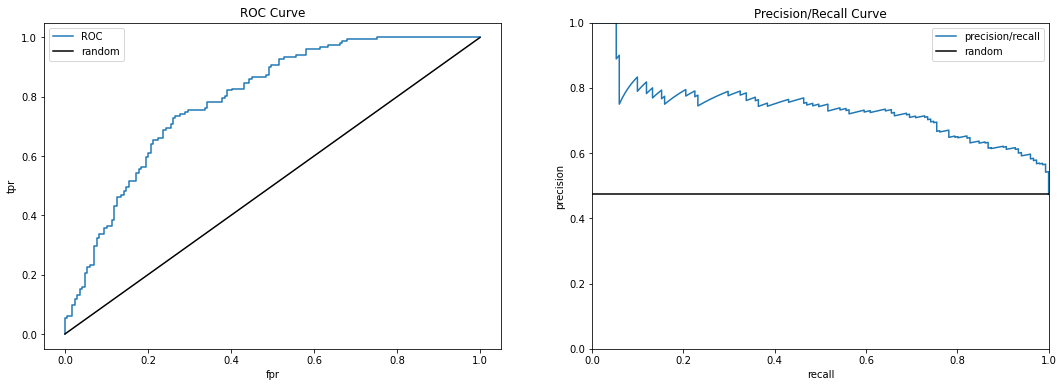

In [98]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(18,6))
df = calculate_threshold_values(model_L2.predict_proba(X_test)[:,1], y_test)
plot_roc(ax0, df)
plot_precision_recall(ax1, df)

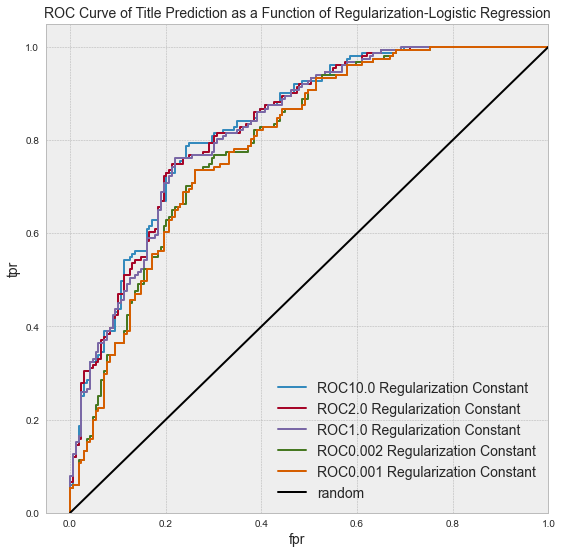

In [316]:
fig, (ax0) = plt.subplots(figsize=(9,9))
plt.style.use('bmh')
C_val=[0.1, 0.5, 1, 500, 1000]
for val in C_val:
    model_C = LogisticRegression(C=val, max_iter=300)#solver lbfgs, L2 cost function
    model_C.fit(X_train, y_train)
    df = calculate_threshold_values(model_C.predict_proba(X_test)[:,1], y_test)
    plot_roc(ax0, df, val)
ax0.set_xlim(-0.05, 1)
ax0.set_ylim(0, 1.05)
ax0.plot([0,1],[0,1], 'k', label="random")
ax0.legend(fontsize=14)
ax0.set_title('ROC Curve of Title Prediction as a Function of Regularization-Logistic Regression', fontsize=14);
plt.savefig('log_regres/Title_ROC_reg', bbox_inches='tight')

In [129]:
from sklearn.linear_model import LogisticRegressionCV

In [133]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [137]:
model_cv=LogisticRegressionCV(3, cv=10, scoring='recall', max_iter=1000)
model_cv.fit(X_train, y_train)

/Users/johnwilliams/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass Cs=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


LogisticRegressionCV(Cs=3, cv=10, max_iter=1000, scoring='recall')

In [198]:
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler

In [308]:
C_val=np.linspace(0.001, 5, 200)

In [242]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various
    values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression
      object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of
      alpha and each cross validation fold.  Each row represents a CV fold, and
      each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        kf = KFold(n_splits=n_folds)
        
        for idx, (train, test) in enumerate(kf.split(X)):
    
            X_cv_train, y_cv_train = X.iloc[train], y.iloc[train]
            X_cv_test, y_cv_test = X.iloc[test], y.iloc[test]
      
            standardizer = StandardScaler()
            standardizer.fit(X_cv_train)
            X_cv_train_std= standardizer.transform(X_cv_train)
            X_cv_test_std= standardizer.transform(X_cv_test)
            
            m = model(C = alpha, max_iter=1000)
            m.fit(X_cv_train_std, y_cv_train)
        
            y_hat_train = m.predict(X_cv_train_std)
            y_hat_test = m.predict(X_cv_test_std)
        
            cv_errors_train[alpha][idx] = recall_score(y_cv_train, y_hat_train)
            cv_errors_test[alpha][idx] = recall_score(y_cv_test, y_hat_test)

    return cv_errors_train, cv_errors_test

In [243]:
cv_errors_train, cv_errors_test = train_at_various_alphas(
    X_train, y_train, LogisticRegression, C_val)  #these are dataframes cols are alpha, index are the folds, mean sq error as vals

In [245]:
avg_errors_train = cv_errors_train.mean()
avg_errors_test = cv_errors_test.mean()

In [265]:
max_recall=avg_errors_test.max()

In [258]:
def get_optimal_alpha(avg_errors_test):
    alphas = avg_errors_test.index
    optimal_idx = np.argmax(avg_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha, optimal_idx
optimal_alpha, optimal_idx = get_optimal_alpha(avg_errors_test)

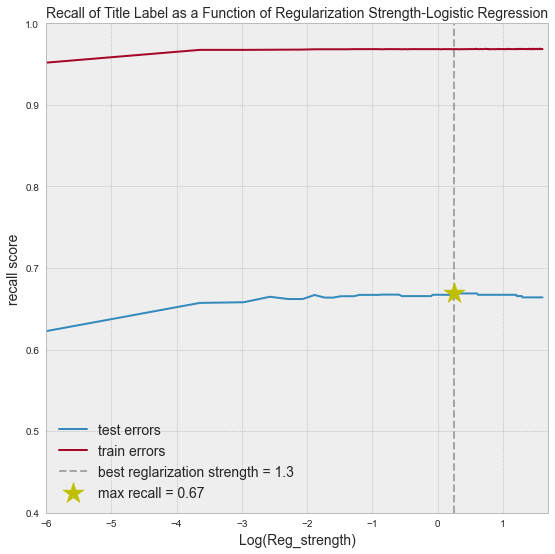

In [315]:
fig, ax=plt.subplots(figsize=(9,9))
plt.style.use('bmh')
ax.plot(np.log(C_val), avg_errors_test, label = 'test errors')
ax.plot(np.log(C_val), avg_errors_train, label = 'train errors')
ax.set_xlabel('Log(Reg_strength)', fontsize=14)
ax.set_ylabel('recall score', fontsize=14)
ax.set_title('Recall of Title Label as a Function of Regularization Strength-Logistic Regression', fontsize=14)
ax.set_xlim(-6, 1.7)
ax.set_ylim(0.4, 1)
ax.scatter(np.log(optimal_alpha), max_recall, label = f'max recall = {max_recall:.2f}', s= 500, color = 'y', marker = '*', zorder=4)
plt.axvline(np.log(optimal_alpha), label = f'best reglarization strength = {optimal_alpha.round(1)}', color = 'k', linestyle = 'dashed', alpha=0.3)

plt.legend(loc = 3, fontsize=14);
plt.savefig('log_regres/Title_rec_reg', bbox_inches='tight')